# K Means Clustering

The K Means Clustering algorithm is a great start to machine learning. It's a *unsupervised* method for *clustering* data - that is, attempting to split data into subsets without initial labels. For k-means clustering, we choose a number k a priori that is the number of clusters we want to cluster into. It's main drawbacks are that it falls to *local minima* - i.e there are cases where we get an obviously incorrect solution but convergence of the algorithm is achieved. This can be mitigated by running the model a number of times since the model is non-deterministic (it has some randomness in its starting parameters). It also fails completely on some more difficult datasets due to the reliance on the Euclidian distance (i.e pointwise distance) metric.

Formally, the objective of this algorithm is to minimise the function:

$$ J = \sum^{k}_{i=1} \sum_{x \in S_i} || x - c_{i} ||^{2} $$ 

Where $S_i$ are our cluster groups, $c_i$ is the cluster center, and $x$ is a data point.

What does this mean? Well we want to choose a clustering $S = \{ S_1, S_2 \dots S_k \} $ such that the sum of distances for each point to it's relative cluster center is as small as possible.

The actual algorithm acts as follows:

1. Set $k$ initial centers - there are a few protocols for this but all involve some random choice.
2. Assign each point to a cluster based on the distance to each one - shortest wins.
3. Recalculate the centers as the (Euclidian) mid-point of each cluster.
4. Repeat 2, 3 until convergence.



In [ ]:
from IPython.display import Image
Image(url='https://dashee87.github.io/images/kmeans.gif')


# An Abstract Example

First let's look at an abstract example with $(x, y)$ data using a simple cluster generator from `sklearn`.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

# The make_blobs function give us a number of points in a number of clusters.
# It also outputs additional information like where these centers lie - but
# we don't want that! So we just get the data out.

data = make_blobs(n_samples=400, centers=4)[0]

# Lets look at the data - it's x, y pairs in a numpy array format.
print(type(data))
print(data[:5])

<class 'numpy.ndarray'>
[[ 9.59465219 -4.71052801]
 [ 8.27822474 -4.51689763]
 [ 9.48739699  5.10155233]
 [ 8.55849534  4.89518933]
 [-7.68377884 -3.2349228 ]]


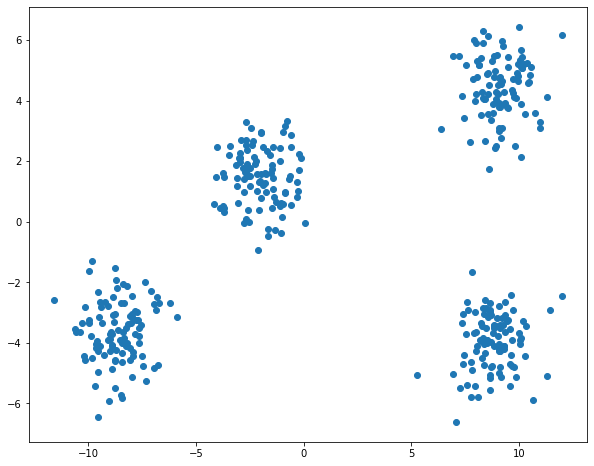

In [ ]:
# Let's take a look at our data.

fig, ax = plt.subplots(figsize=(10, 8))

# We need to index all the x points and all the y points respectively to get them
# plotted. Luckily we know how to do this using numpy indexing!

# (Take every row's 1st item)
x = data[:, 0]

# (Take every row's 2nd item)
y = data[:, 1]

ax.scatter(x, y)

plt.show()

Note - make sure the number of clusters you see above is equal to the argument in the `make_blobs` function - you may have two blobs on top of each other. In this case, just run the function again.

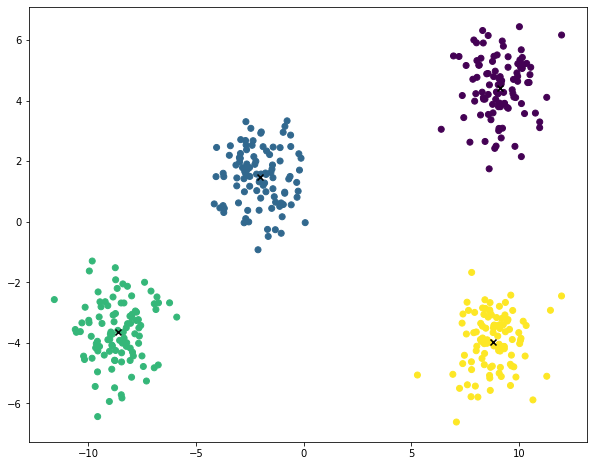

In [ ]:
# Now let's make a model.

model = KMeans(n_clusters=4)

# Now let's fit the model

model.fit(data)

# That's right. It's that simple! Now the model object has "filled" a number 
# of attributes with important information. Let's use these in a new plot.
 A
fig, ax = plt.subplots(figsize=(10, 8))

# sklearn uses _ at the end of variables that are fitted
centers = model.cluster_centers_

labels = model.labels_

ax.scatter(x, y, c=labels)
ax.scatter(centers[:,0],centers[:,1], marker="x", c="Black")

plt.show()

Huge - it's that simple. We've built our first real machine learning model in just a few lines - but this is the simplest possible example. The Euclidian distance metric we are aiming to minimise can be extended to any number of dimensions (even more than 3!) - so we aren't always able to visualise our data. We may need to get creative with testing our results to check we've made something usable!

You might be asking - how do we decide $k$ then if we can't see our data? Well, there are a number of formal methods I won't get into, but the simplest is the "elbow method". Let's write a program to complete the above task but with different values of $k$.

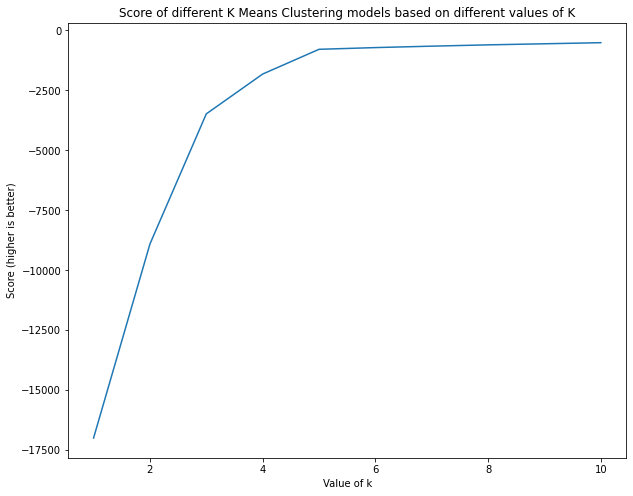

In [ ]:
import random

# Chose a random number either 3, 4 or 5
random_k = random.randint(3, 5)

data = make_blobs(n_samples=400, centers=random_k)[0]



scores = []




for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    
    # Score the model
    scores.append(model.score(data))

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(list(range(1, 11)), scores)

ax.set_xlabel("Value of k")
ax.set_ylabel("Score (higher is better)")
ax.set_title("Score of different K Means Clustering models based on different values of K")

plt.show()

Here we see that we start to really get diminishing returns at a certain point. This is typically called the "elbow point" and is what value you can use for $k$. Obviously this is not a very mathematical way of doing it and there are better methods, but is a good "quick and dirty" way to do it in practice.

# Worked Activity/Second Example

A fantastic example of us getting creative with what our "data" is, and how we can preprocess it is in a process known as image quantisation. Older computers would only be able to produce a set number of colours, so developers had to get creative with how they would choose these colours to make the images look as realistic as possible. For a general purpose system, the obvious choice is to select a wide range of colours to cover as much of the spectrum as possible - but what if we just wanted to reduce the colours of one image to say, 16 colours - and how would it compare to randomly chosen colours? Let's have a look:

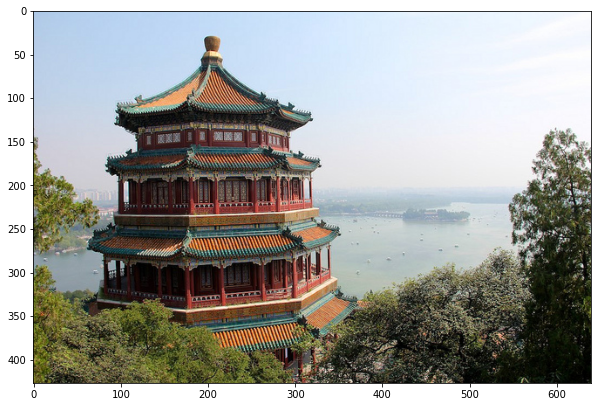

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin


# Let's use some helper functions to make this a bit quicker
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

# Load sample image
china = load_sample_image("china.jpg")


fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(china)
plt.show()

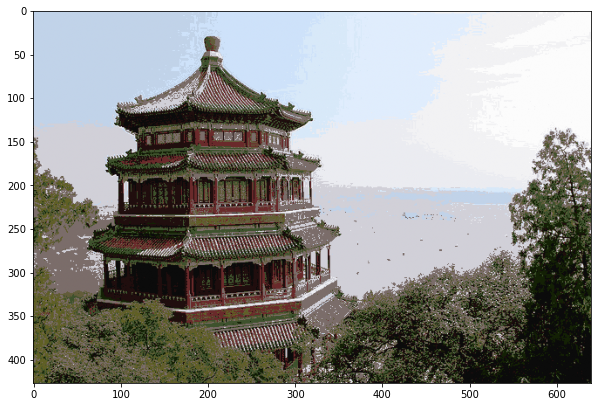

In [ ]:
# According to the image spec, this image has 96,615 unique colors.
# What if we chose 32 colours at random and mapped each pixel to it's nearest
# colour using R, G, B values as our coordinates (x, y, z)?

china = np.array(china, dtype=np.float64) / 255

w, h, d  =  china.shape

# Reshape the data to a single "column" of (x, y, z) data
image_array = np.reshape(china, (w * h, d))

# Shuffle the data and choose the first 32 points - these are our randomly
# selected colours.

codebook_random = shuffle(image_array, random_state=0)[:16]

# Then for each point in the image, compute which of the above colours is closest
# via pairwise distance (Euclidian). Note these labels down
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)

# Recreate the image from the labels

image = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
    for j in range(h):
        image[i][j] = codebook_random[labels_random[label_idx]]
        label_idx += 1

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image)

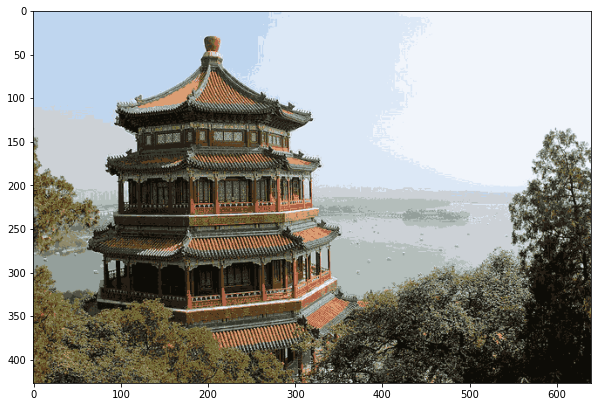

In [ ]:
# Now let's try it with a KMeans clustering model

kmeans = KMeans(n_clusters=16, random_state=0).fit(image_array)

labels = kmeans.predict(image_array)


# Recreate the image from the labels

image = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
    for j in range(h):
        image[i][j] = kmeans.cluster_centers_[labels[label_idx]]
        label_idx += 1

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image)

# Activity 2

There's one dataset we've been working with that is naturally clusters - the `iris` dataset! Try performing a clustering algorithm using the 4 features as $(w, x, y, z)$ coordinates (we are working in 4d!) and 3 species as classes. For now, there is no need to worry about train/test splitting. After doing so, let's do some more work to get some additional insights into how our model works.

* Perform k-means clustering on the dataset using all features. 
* Then, by creating a new column on the dataframe with the expected species, calculate the accuracy of the model.
* Using the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function, show *where* these errors are coming from (i.e. where your model gets "confused"!).
* Pick two features and perform k-means clustering using just those two features. Is the accuracy of this model worse or better than the 4 feature model?
* Plot a graph of the clustering using the two feature model, with cluster centers and colours denoting cluster membership.
* Can you think of a way to find the best two features to use?
* Can you think of a way to improve performance of the model while still keeping it visualisable on the 2D plane? (This is the basis for another model we will be looking at!).



# Activity 3

The power of unsupervised learning is the lack of need of labels - however it comes at a significant cost to performance, and perhaps more importantly, a lack of direct intepretability of output.

The [`sklearn.datasets.load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) function will load a dataset for a very popular benchmark ML task - reading handwritten digits. It comes with labels, but in the following activity we will discard them in favour of using an unsupervised method. 

1. Read the description of the data and write a short introduction as to what the data is.
2. Preprocess the data in a suitable fashion
3. Use a K-Means clustering algorithm to cluster the data into 10 clusters (here we know K before we start - one for each digit).
4. Obtain the center of each cluster and process them back into an image form (this will be similar to the preprocessing function in reverse)
5. Plot each cluster center as a graph - if you have done everything correctly these should somewhat resemble digits. Label each digit with what you think it is.


In [ ]:
()